<a href="https://colab.research.google.com/github/SowjanyaKiran/Regression-with-Artificial-Neural-Networks-ANN-/blob/main/Regression_with_Artificial_Neural_Networks_Taxi_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the necssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Loading the dataset
df = pd.read_csv('/content/taxi_trip_pricing.csv')
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [ ]:
#Load tail data set
df.tail()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090
999,22.85,Morning,Weekend,3.0,Medium,Clear,4.34,NaN,0.23,29.69,45.4437


In [ ]:
#Checking the dataset type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [ ]:
#Checking the dataset info
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [ ]:
#Checking the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [ ]:
#Checking the NULL values
df.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [ ]:
#Checking the NULL values
df.isnull().sum().any()

np.True_

In [ ]:
#Checking the null values and dropping null data set
df.dropna(inplace=True)

In [ ]:
#Checking the NULL values
df.isnull().sum().any()

np.False_

In [ ]:
#Getting the shape of the data
df.shape

(562, 11)

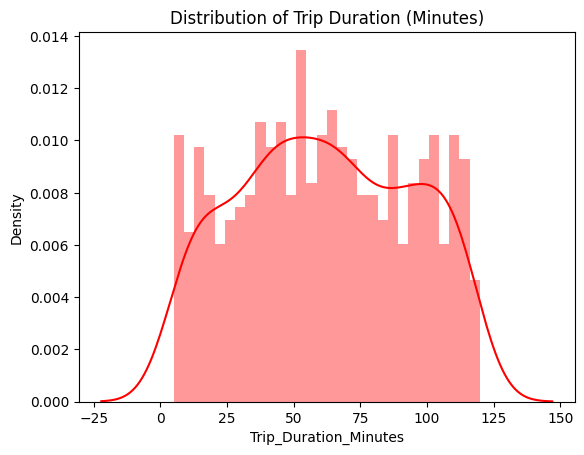

In [ ]:
# Distribution of target
sns.distplot(df['Trip_Duration_Minutes'], kde = True ,bins=30, color = 'red')
plt.title("Distribution of Trip Duration (Minutes)")
plt.show()

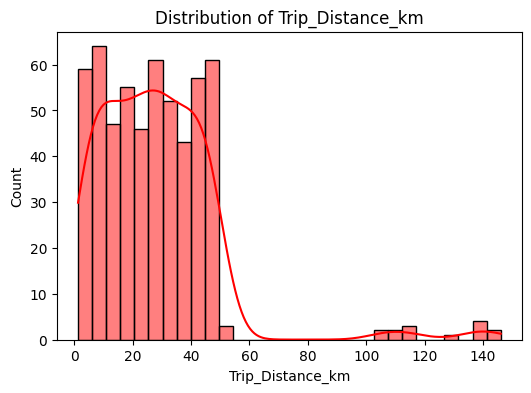

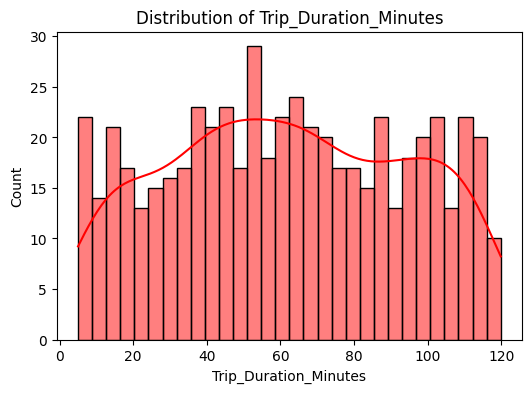

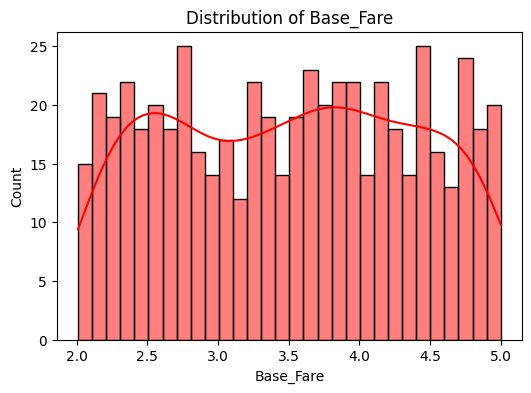

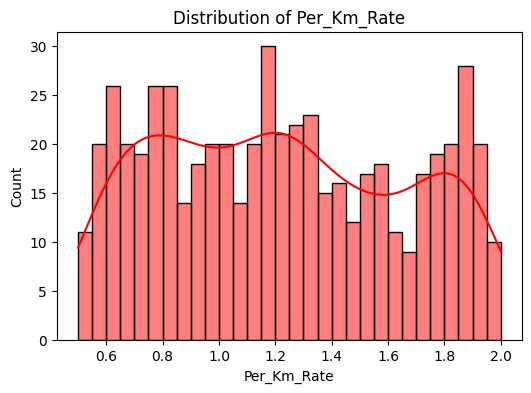

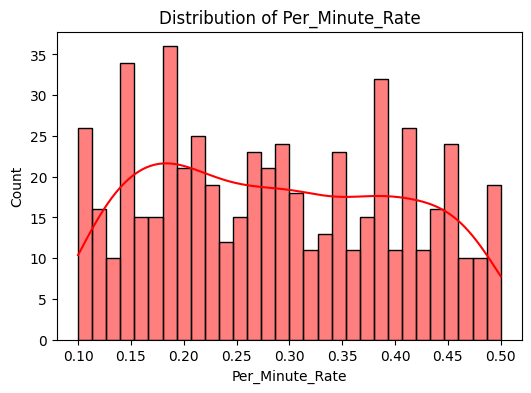

In [ ]:
# Distribution of numerical features
num_cols = ["Trip_Distance_km", "Trip_Duration_Minutes", "Base_Fare", "Per_Km_Rate", "Per_Minute_Rate"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30 , color = 'red')
    plt.title(f"Distribution of {col}")
    plt.show()

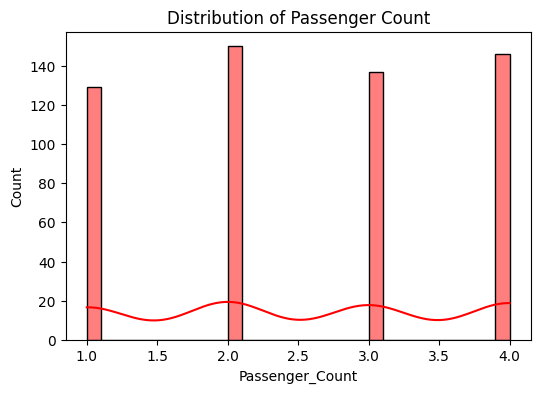

In [ ]:
# plot Passenger Count distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Passenger_Count'], kde=True, bins=30 , color = 'red')
plt.title("Distribution of Passenger Count")
plt.show()

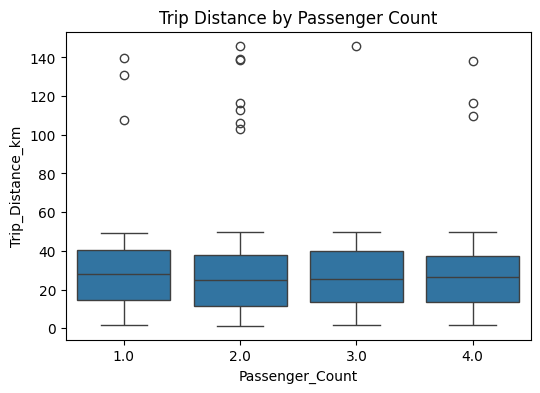

In [ ]:
#plot Trip Distance vs Passenger Count
plt.figure(figsize=(6,4))
sns.boxplot(x="Passenger_Count", y="Trip_Distance_km", data=df)
plt.title("Trip Distance by Passenger Count")
plt.show()

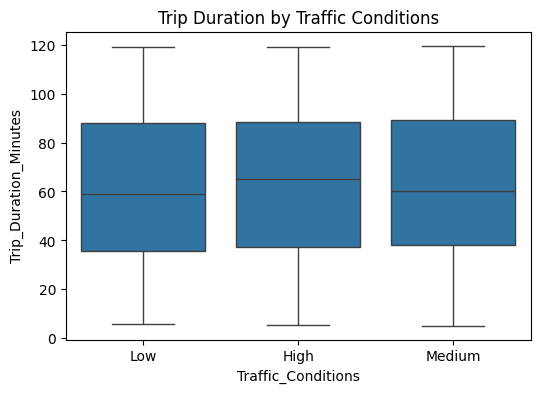

In [ ]:
# Plot Traffic Conditions vs Trip Duration
plt.figure(figsize=(6,4))
sns.boxplot(x="Traffic_Conditions", y="Trip_Duration_Minutes", data=df)
plt.title("Trip Duration by Traffic Conditions")
plt.show()

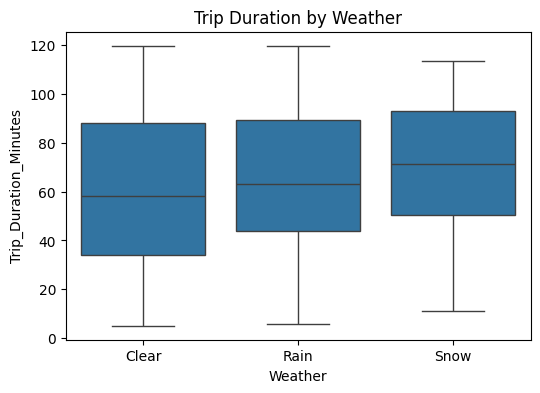

In [ ]:
#Plot Weather vs Trip Duration
plt.figure(figsize=(6,4))
sns.boxplot(x="Weather", y="Trip_Duration_Minutes", data=df)
plt.title("Trip Duration by Weather")
plt.show()

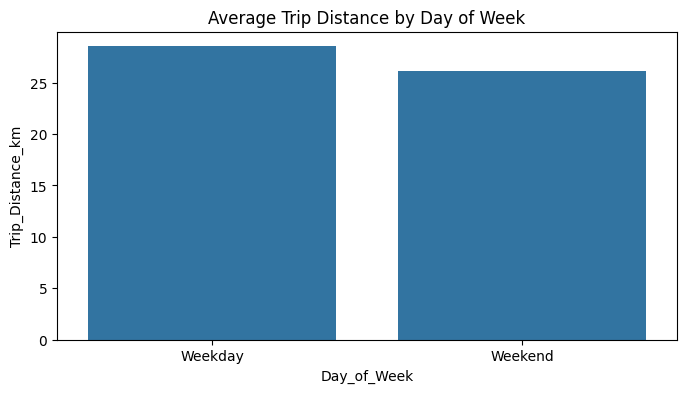

In [ ]:
#plot Day of Week vs Average Trip Distance
plt.figure(figsize=(8,4))
sns.barplot(x="Day_of_Week", y="Trip_Distance_km", data=df, estimator="mean", ci=None)
plt.title("Average Trip Distance by Day of Week")
plt.show()

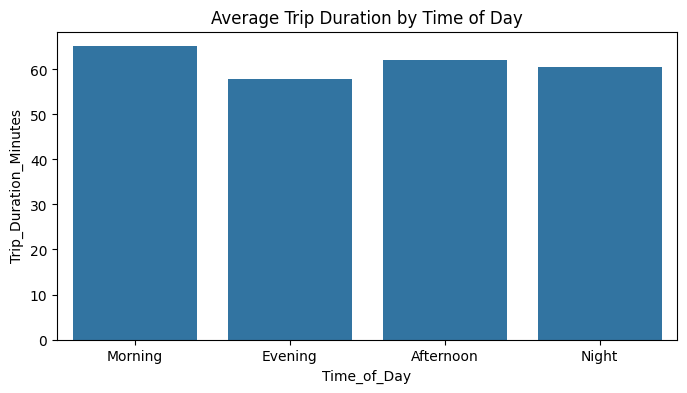

In [ ]:
#plot Time of Day vs Average Trip Duration
plt.figure(figsize=(8,4))
sns.barplot(x="Time_of_Day", y="Trip_Duration_Minutes", data=df, estimator="mean", ci=None)
plt.title("Average Trip Duration by Time of Day")
plt.show()

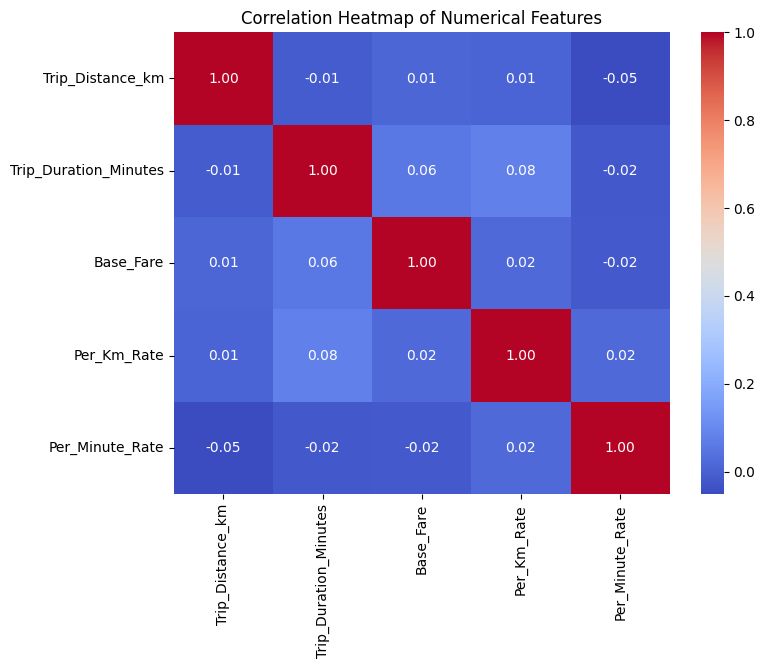

In [ ]:
#plot Correlation Heatmap (numerical features)
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

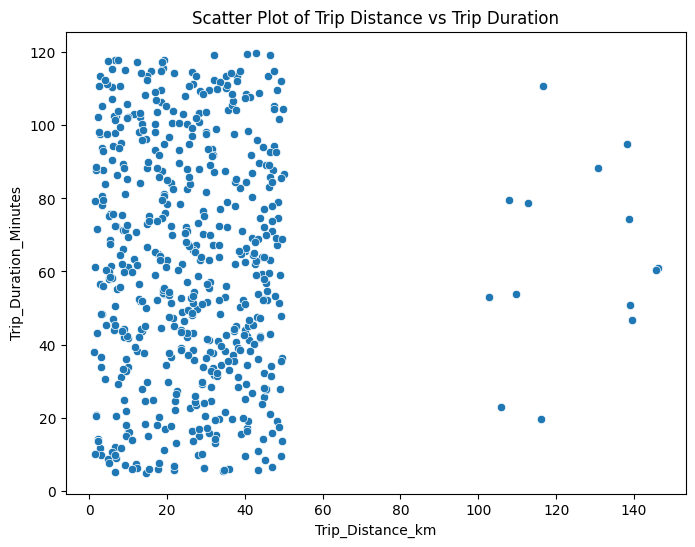

In [ ]:
#Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="Trip_Distance_km", y="Trip_Duration_Minutes", data=df)
plt.title("Scatter Plot of Trip Distance vs Trip Duration")
plt.show()

In [ ]:
#Features (X) and Target (y)
X = df.drop(columns=["Trip_Price"])
y = df["Trip_Price"]

In [ ]:
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4833.3530 - mae: 56.8758 - val_loss: 5713.5850 - val_mae: 58.9414
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4562.5562 - mae: 54.8828 - val_loss: 5605.3623 - val_mae: 58.0945
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4697.9204 - mae: 54.7538 - val_loss: 5481.0474 - val_mae: 57.1025
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4561.3062 - mae: 53.9843 - val_loss: 5326.8037 - val_mae: 55.8529
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4804.9966 - mae: 53.7730 - val_loss: 5141.6089 - val_mae: 54.3310
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4850.8672 - mae: 52.3916 - val_loss: 4915.5938 - val_mae: 52.4444
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3567.4075 - mae: 46.8885 - val_loss: 4653.2021 - val_mae: 50.1743
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 4220.3232 - mae: 47.2895 - val_loss: 4339.2808 - val_mae: 47.4169


In [ ]:
#Evaluate Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Predictions
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 169.3911962275433
MAE: 7.790792735041121
R² Score: 0.9325347175236731


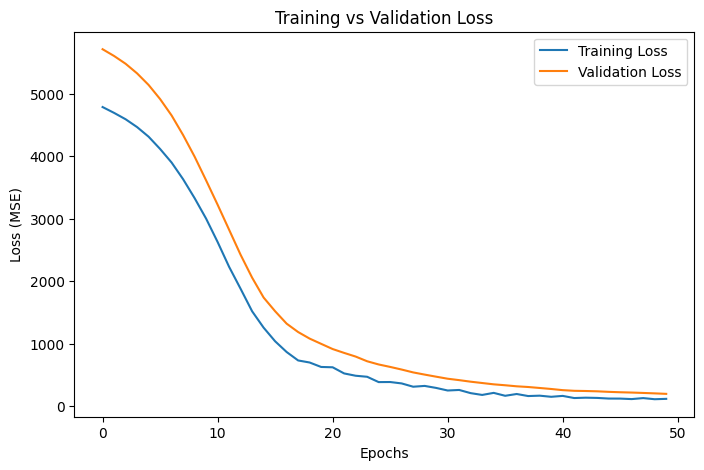

In [ ]:
# Plot training & validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

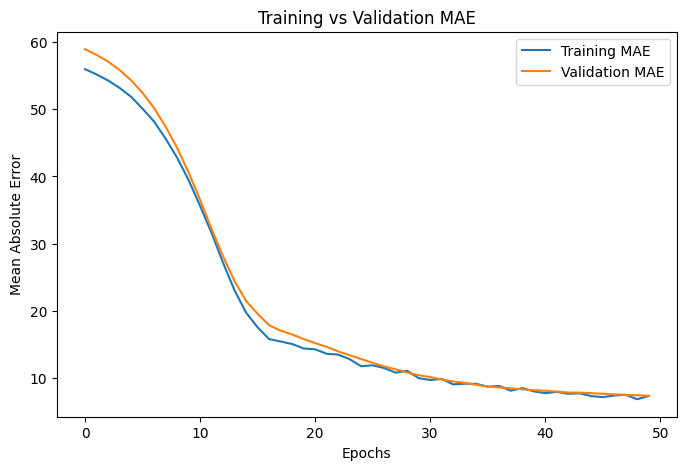

In [ ]:
# Plot training & validation MAE
plt.figure(figsize=(8,5))
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Training vs Validation MAE")
plt.legend()
plt.show()